MILESTONE 1

# Intro

# I. Problem Identification
* Name : Iqbal Awis Nurdiansyah
* Batch : RMT-19

Background: I am a data analyst who works in one of the best football leagues in the world, the English Premier League. My role is to analyze the entire lineups and teams participating in the Premier League Season 2017/18.

**Objectiv**: To provide information to all viewers about player data and team data for the matches in the Premier League Season 2017/18.

**Problem Statement** : 


1. Who is the player with the highest market value? 
2. Which team has the highest average player market value? 
3. Find the club with the youngest average age of players. 
4. Determine the number of players based on their positions. 
5. Which region has the highest number of players in the Premier League? Are most of them from England? 
6. Hypothesis testing: Is the average market value of Chelsea the same as Arsenal?


**SMART METHOD**

* **Spesific** obtain player and team data for the Premier League Season 2017/18.
* **Measurable** Collect information on market values, player counts, and player origins in the Premier League Season 2017/18. 
* **Achievable** Process the data using data wrangling or preprocessing methods to generate insights. 
* **Relevant** As a data analyst, data preprocessing is crucial for analyzing Premier League data effectively. 
* **Time-Bond** The required data pertains to the Premier League Season 2017/18.


# II. Data Loading

## Import Library

In [1]:
# import library
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns


Source datasets: `https://www.kaggle.com/datasets/mauryashubham/english-premier-league-players-dataset?datasetId=1808`

In [2]:
df=pd.read_csv('epldata_final.csv')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


# III. Data Cleaning

## Missing Value

In [4]:
#Check Missing value
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

there's missing value in `region` coloums

In [5]:
missing_values = df.loc[df['region'].isna()]
print(missing_values)

             name          club  age position  position_cat  market_value  \
188  Steve Mounie  Huddersfield   22       CF             1           5.5   

     page_views  fpl_value fpl_sel  fpl_points  region nationality  \
188          56        6.0   0.60%           0     NaN       Benin   

     new_foreign  age_cat  club_id  big_club  new_signing  
188            0        2        8         0            0  


There is a missing value in the "region" column for the player named "Steve Mounie."

In [6]:
# fill missing value  'region' to 'Rest of World'
df['region'] = df['region'].fillna('Rest Of World')

In [7]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

Data are clean from missing value

## Drop Coloumn

In [8]:
#drop table
df_drop = df.drop(['new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing'], axis=1)
df_drop

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France
...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England


drop coloumns 'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing' because we don't need in Problem Statement

## Manipulated Data

In [9]:
#Manipulated data
df_drop['position_cat']=df_drop['position_cat'].astype(str)
df_drop['region']=df_drop['region'].astype(str)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    object 
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    object 
 11  nationality   461 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 43.3+ KB


coloumn `position_cat` and `region` change to string 

## Manipulated value

In [10]:
#update value kolom position_cat
df_drop['position_cat'] = df_drop['position_cat'].replace({'1': 'attacker', '2': 'midfielder', '3': 'defender', '4': 'goalkeeper'})

#update value kolom region
df_drop['region'] = df_drop['region'].replace({'1.0': 'England', '2.0': 'EU', '3.0': 'Americas', '4.0': 'Rest Of World'})
df_drop

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality
0,Alexis Sanchez,Arsenal,28,LW,attacker,65.0,4329,12.0,17.10%,264,Americas,Chile
1,Mesut Ozil,Arsenal,28,AM,attacker,50.0,4395,9.5,5.60%,167,EU,Germany
2,Petr Cech,Arsenal,35,GK,goalkeeper,7.0,1529,5.5,5.90%,134,EU,Czech Republic
3,Theo Walcott,Arsenal,28,RW,attacker,20.0,2393,7.5,1.50%,122,England,England
4,Laurent Koscielny,Arsenal,31,CB,defender,22.0,912,6.0,0.70%,121,EU,France
...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,midfielder,5.0,288,4.5,0.40%,38,EU,Switzerland
457,Arthur Masuaku,West+Ham,23,LB,defender,7.0,199,4.5,0.20%,34,Rest Of World,Congo DR
458,Sam Byram,West+Ham,23,RB,defender,4.5,198,4.5,0.30%,29,England,England
459,Ashley Fletcher,West+Ham,21,CF,attacker,1.0,412,4.5,5.90%,16,England,England


in coloums 'position_cat' changes to : 

* 1=attacker,
* 2=midfilder,
* 3=defender,
* 4=goalkeeper

in `region` coloums :

* 1.0 = England
* 2.0 = EU
* 3.0 = Americas
* 4.0 = Rest Of World

The data has been modified to make it more visually clear when visualized and ready for exploration according to the problem statement.

In [11]:
clean_data=df_drop
clean_data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality
0,Alexis Sanchez,Arsenal,28,LW,attacker,65.0,4329,12.0,17.10%,264,Americas,Chile
1,Mesut Ozil,Arsenal,28,AM,attacker,50.0,4395,9.5,5.60%,167,EU,Germany
2,Petr Cech,Arsenal,35,GK,goalkeeper,7.0,1529,5.5,5.90%,134,EU,Czech Republic
3,Theo Walcott,Arsenal,28,RW,attacker,20.0,2393,7.5,1.50%,122,England,England
4,Laurent Koscielny,Arsenal,31,CB,defender,22.0,912,6.0,0.70%,121,EU,France
...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,midfielder,5.0,288,4.5,0.40%,38,EU,Switzerland
457,Arthur Masuaku,West+Ham,23,LB,defender,7.0,199,4.5,0.20%,34,Rest Of World,Congo DR
458,Sam Byram,West+Ham,23,RB,defender,4.5,198,4.5,0.30%,29,England,England
459,Ashley Fletcher,West+Ham,21,CF,attacker,1.0,412,4.5,5.90%,16,England,England


* name: Player Name
* club: Club Name
* age: Player Age
* position: Playing Position
* position_cat: Position Category
* market_value: Player's Market Value (in million Pounds)
* page_views: Average Wikipedia Page Views
* fpl_value: Value in Fantasy Premier League app
* fpl_sel: Percentage Selected in Core Squad
* fpl_points: FPL Points from Previous Season
* region: Player's Region of Origin
* nationality: Player Nationality

# IV. Analysis

# 1. Who is the player with the highest market value?

In [12]:
#sort market value
df_sorted = clean_data.sort_values('market_value', ascending=False)
df_sorted

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality
92,Eden Hazard,Chelsea,26,LW,attacker,75.00,4220,10.5,2.30%,224,EU,Belgium
263,Paul Pogba,Manchester+United,24,CM,midfielder,75.00,7435,8.0,19.50%,115,EU,France
0,Alexis Sanchez,Arsenal,28,LW,attacker,65.00,4329,12.0,17.10%,264,Americas,Chile
240,Kevin De Bruyne,Manchester+City,26,AM,attacker,65.00,2252,10.0,17.50%,199,EU,Belgium
241,Sergio Aguero,Manchester+City,29,CF,attacker,65.00,4046,11.5,9.70%,175,Americas,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...
436,Sam Field,West+Brom,19,CM,midfielder,0.25,15,4.5,0.10%,9,England,England
177,Jack Payne,Huddersfield,25,CM,midfielder,0.25,81,4.5,0.10%,0,England,England
178,Dean Whitehead,Huddersfield,35,CM,midfielder,0.25,161,4.5,0.10%,0,England,England
283,Joel Castro Pereira,Manchester+United,21,GK,goalkeeper,0.10,395,4.0,1.00%,6,EU,Portugal


The data is sorted based on the player's market value.

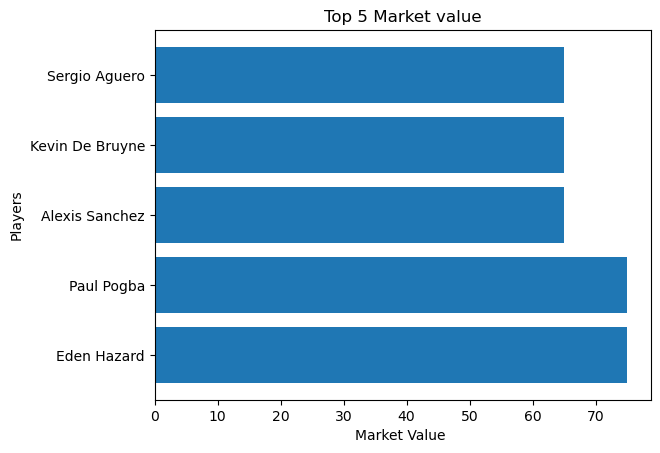

In [24]:

df_sorted = clean_data.sort_values('market_value', ascending=False)

# create bar plot
plt.barh(df_sorted['name'].head(5), df_sorted['market_value'].head(5))
plt.xlabel('Market Value ')
plt.ylabel('Players')
plt.title('Top 5 Market value')
plt.show()

Eden Hazard and Paul Pogba are the players with the highest market value, priced at £75 million each, followed by Alexis Sanchez, Kevin De Bruyne, and Sergio Aguero, each with a market value of £65 million.

# 2. Which team has the highest average player market value?

In [14]:
# group players by club and calculate the average market value for each club
club_mean = clean_data.groupby('club')['market_value'].mean()

# sort the clubs based on the highest average market value and take the top 5 clubs.
club_sorted = club_mean.sort_values(ascending=False).head(5)
club_sorted

club
Manchester+City      28.200000
Chelsea              27.677500
Tottenham            23.000000
Manchester+United    20.564000
Arsenal              19.642857
Name: market_value, dtype: float64

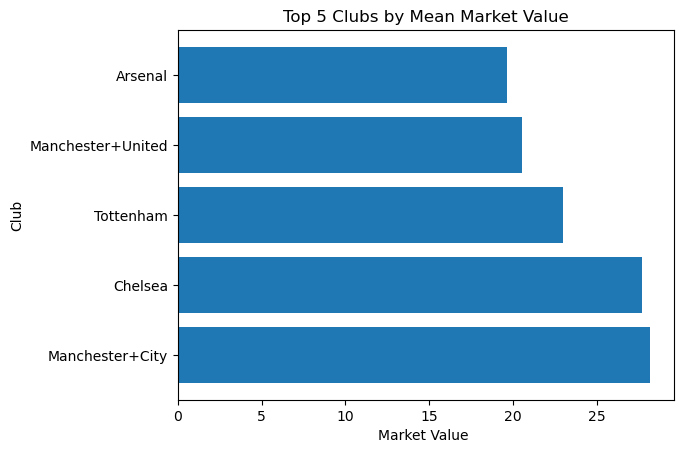

In [15]:
# create bar plot
plt.barh(club_sorted.index, club_sorted.values)

# create x and y axis
plt.xlabel('Market Value ')
plt.ylabel('Club')

# title plot 
plt.title('Top 5 Clubs by Mean Market Value')

# show plot
plt.show()


Clubs with the highest market value:

* Manchester City = £28.2 million 
* Chelsea = £27.6 million 
* Tottenham = £23 million 
* Manchester United = £20.5 million 
* Arsenal = £19.6 million

# 3. Find the club with the youngest average age of players.

In [16]:
player_mean = clean_data.groupby('club')['age'].mean()

# sort the clubs based on the lowest average age of player
player_sorted = player_mean.sort_values(ascending=True).head(5)
player_sorted

club
Liverpool            24.777778
Southampton          24.956522
Manchester+United    25.560000
Tottenham            25.650000
Huddersfield         26.000000
Name: age, dtype: float64

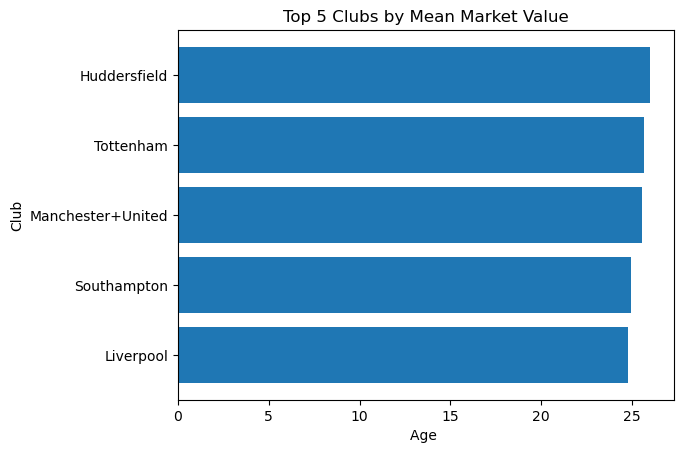

In [25]:
plt.barh(player_sorted.index, player_sorted.values)

# create x and y axis
plt.xlabel('Age ')
plt.ylabel('Club')

# title plot 
plt.title('Top 5 Clubs by Mean Market Value')

# show plot
plt.show()


Since Liverpool has the lowest average age among all the clubs, it can be said that Liverpool is the team with the youngest squad, with an average age of 24 years.

# 4. Number of players based on their position categories.

In [18]:
clean_data.groupby(['position_cat'])['position_cat'].count()

position_cat
attacker      154
defender      153
goalkeeper     42
midfielder    112
Name: position_cat, dtype: int64

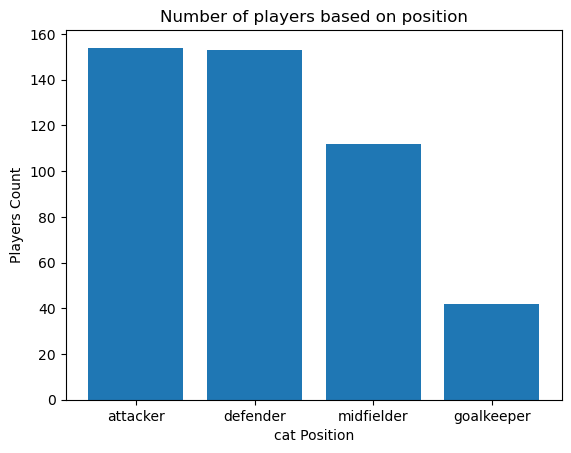

In [26]:
pos = clean_data.groupby(['position_cat'])['position_cat'].count().to_frame(name='player_count')
pos_sorted = pos.sort_values(by='player_count', ascending=False)

plt.bar(pos_sorted.index, pos_sorted['player_count'])
plt.xlabel('cat Position')
plt.ylabel('Players Count')
plt.title('Number of players based on position')
plt.show()

In the Premier League Season 2017/18, the position with the highest number of players is the 'attacker' position.

# Statistic Descriptive

## 5. Which region do most players in the Premier League come from? Is it England?

Mod from region columns: EU


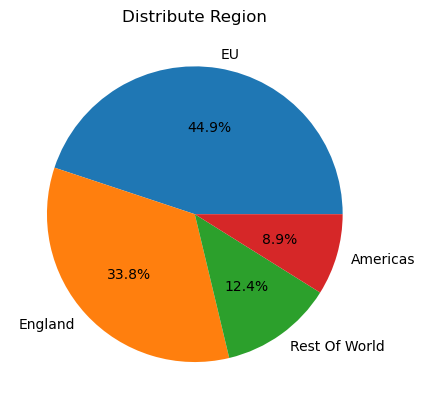

In [28]:
# Find Mod in region columns
modus_region = clean_data['region'].mode()[0]
print('Mod from region columns:', modus_region)
count_by_region = clean_data['region'].value_counts()
plt.pie(count_by_region, labels=count_by_region.index, autopct='%1.1f%%')
plt.title('Distribute Region')
plt.show()



To find the region with the most players in the Premier League Season 2017/18, we can determine the mode in the `region` column. England is not the region with the highest number of players; the European Union (EU) region has the highest number of players in the Premier League.

# Statistic Inferential

## 6. Hypothesis Testing: Is the average market value of Chelsea equal to Arsenal?

One Sample Two tailed


Our Hypothesis on this case : 
* H0 : market value chelsea = market_value_arsenal
* H1 : market value chelsea != market_value_arsenal


In [21]:
# extract  market value data dari Chelsea and Arsenal
market_value_chelsea = clean_data[clean_data['club'] == 'Chelsea']['market_value']
market_value_arsenal = clean_data[clean_data['club'] == 'Arsenal']['market_value']

# perform t-test
t, p = ttest_ind(market_value_chelsea, market_value_arsenal)

# print p-value
print("p-value = ", p)

p-value =  0.09319356813417434


Since the p-value is greater than 0.05, we reject the null hypothesis. This means that the market value of Chelsea players is not equal to the market value of Arsenal players.

C:\Users\maddi\AppData\Local\Temp\ipykernel_23948\2519579805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_value_chelsea, label='Chelsea')
C:\Users\maddi\AppData\Local\Temp\ipykernel_23948\2519579805.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_value_arsenal, label='Ar

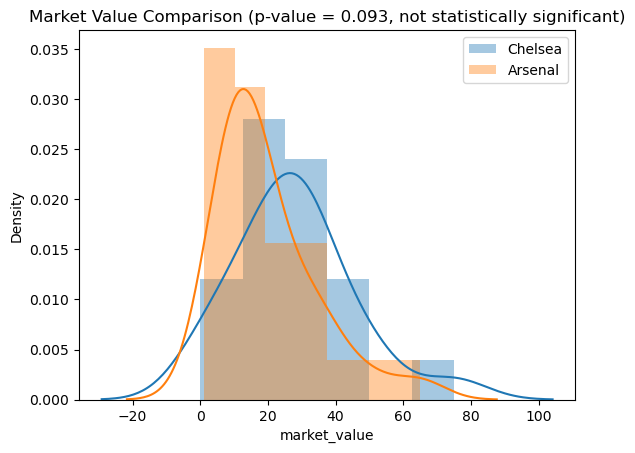

In [22]:
# create distibution plot
sns.distplot(market_value_chelsea, label='Chelsea')
sns.distplot(market_value_arsenal, label='Arsenal')

# add legend and p-value to plot
plt.legend()
if p < 0.05:
    plt.title('Market Value Comparison (p-value = {:.3f}, statistically significant)'.format(p))
else:
    plt.title('Market Value Comparison (p-value = {:.3f}, not statistically significant)'.format(p))

# show plot
plt.show()

From the graph, it appears that there is a difference between the average market values of Chelsea and Arsenal players, although it may not be statistically significant

# Conclusion

From all the explanations above, it can be concluded that the English Premier League has many star players, with Paul Pogba and Eden Hazard being the most expensive players, reaching a value of £75 million. This depicts that the Premier League is one of the best professional football leagues in the world today. However, it is unfortunate that English players are outnumbered by foreign players. This is a significant note for football authorities in England to improve their efforts in developing young players, so that English players have more opportunities to play in their own country.

# Dashboard

`https://lookerstudio.google.com/reporting/446a94a0-e8e0-43ae-93a1-daf1c27ecd1a`